# Problem set 1: Solving the consumer problem

In this first problem set, we will take a look at solving the canonical utility maximization problem for the consumer.  

**Problem set structure:** 
* Each problem set consists of tasks and problems. _Tasks_ train you in using specific techniques, while _problems_ train you in solving actual economic problems. 
* Each problem set also contains solutions, which can be found in separate Python files.
* The Python files `A[..].py` do not run out of the box. But you can copy the code into your notebook or user module. 
* *You should really try to solve the tasks and problems on your own before looking at the answers!* 
* You goal should, however, not be to write everything from scratch. 
* Finding similar code from the lectures and adjusting it is completely ok. I rarely begin  completely from scratch, I figure out when I last did something similar and copy in the code to begin with. A quick peak at the solution, and then trying to write the solution yourself is also a very beneficial approach.

**Multiple solutions:** Within the field of numerical analysis there is often many more than one way of solving a specific problem. So the solution provided is just one example. If you get the same result, but use another approach, that might be just as good (or even better).

**Extra problems:** Solutions to the extra problems are not provided, but we encourage you to take a look at them if you have the time.

# Tasks

## functions

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

In [7]:
# write your own code here
def u(x1,x2, alpha=0.5, beta=1): 
    u=(alpha*x1**(-beta)+(1-alpha)*x2**(-beta))**(-1/beta)
    return u


**Answer:** see A1.py

## print

In [8]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [9]:
# update this code

def print_table(x1_vec,x2_vec):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}' #How long to the left you wanna be
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' #Adds a top row with index. 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        if i > 0: #To avoid two columns with 0
            text += '\n' # line shift - In order to get the next text in the right place. Otherwise the table will look stupid
        text += f'{i:6d}' #Adds a new row with x_1 in index form. 
        for j, x2 in enumerate(x2_vec): #We do not use i because we want values in all columns. 
            text += f'{u(x1,x2):6.3f}'#Her indsætter den værdier i et dobbelt loop. For alle j i "i" laver den en værdi

    # d. print
    print(text) 
print_table(x1_vec,x2_vec)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.711 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.711 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100


**Answer:** see A2.py

## matplotlib

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [10]:
# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

C:\Users\Ander\AppData\Local\Temp\ipykernel_18128\162237482.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


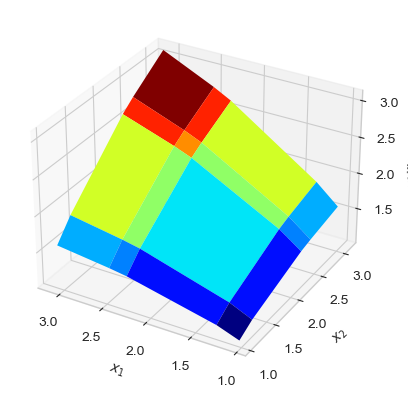

In [11]:
# evaluate utility function
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
u_grid = u(x1_grid,x2_grid) #Makes the cross product based on values from x1_vec and x2_vec

# write your code here
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet) #The first is the first value, second value and then the utility. 

# b. add labels
ax.set_xlabel('$x_1$') #$ just activates math mode. 
ax.set_ylabel('$x_2$')
ax.set_zlabel('$utility,u$')

# c. invert xaxis
ax.invert_xaxis() #So the x axis starts in the middle. 


**Answer:** see A3.py

## optimize

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Solve this problem and illustrate your results.

best with loop is           -0.88366802 at x = -1.51515152
best with scipy.optimize is -0.88786283 at x = -1.42756250


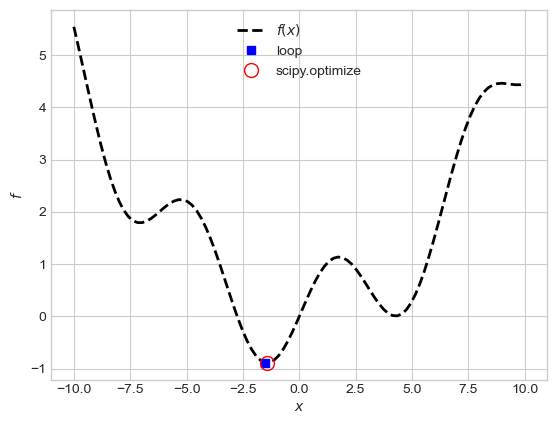

In [12]:
# update this code
import numpy as np

# a. define function
def f(x):
    f=np.sin(x)+0.05*x**2
    return f # wrong line

# b. solution using a loop
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number

for i,x in enumerate(x_vec): #This tries to find the optimal problem. 
    f_now = f_vec[i] = f(x) #This takes the actual value. I.e. the number of x. 
    if f_now < f_best: #Check if the value is lower. Only if it keeps the value and save it as x_best and f_best
        x_best = x
        f_best = f_now

# c. solution using scipy optmize - Another way to solve it. 
from scipy import optimize
x_guess = [0] #Change the value to 5, if wanna see the problem about this method.       
objective_function = lambda x: f(x[0]) #Necessary to optimize
res = optimize.minimize(objective_function, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0]
f_best_scipy = res.fun

#Printing results - Just more advanced way
print(f'best with loop is           {f_best:.8f} at x = {x_best:.8f}') #Printer resultaterne i fancy way
print(f'best with scipy.optimize is {f_best_scipy:.8f} at x = {x_best_scipy:.8f}') #Printer resultaterne i fancy way

#Showing: 
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1) #3D plot. 

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop') #Plotter værdier for script. 
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize') #Plotter værdier for script. 

ax.set_xlabel('$x$') #Tilføjer labels 
ax.set_ylabel('$f$') #TIlføjer labels
ax.grid(True) #Lidt usikker på hvad denne gør. 
ax.legend(loc='upper center'); #Placerer legends. 






**Answer:** see A4.py

# Problem

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

You can use the following functions:

In [13]:
def utility_function(x,alpha):
    # ensure you understand what this function is doing

    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now 
    return u #It makes the utility function as the function above. However, it must be higher than 0. 
    
def expenditures(x,p):
    # ensure you understand what this function is doing

    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E #Does almost the same. 

def print_solution(x,alpha,I,p):
    # you can just use this function
    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

You can initially use the following parameter choices:

In [19]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

Solving with a loop:

In [29]:
# update this code

N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector between 0 and 1
x_max = I/p # maximum x so E = I

x_best = np.array([0,0,0,0,0]) #Alternative x_best = np.empty(5)
u_best = -np.inf # the worst it can get

for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    E = expenditures(x,p)
                    if E <= I:
                        u_now = utility_function(x,alpha)
                        if u_now>u_best: #Only if 
                            x_best=x #Save the best x function
                            u_best=u_now #Save the best utility. 
                            
            

print_solution(x_best,alpha,I,p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


> **Extra:** The above code can be written nicer with the ``product`` function from ``itertools``. See A6

Solving with a numerical optimizer:

In [41]:
# update this code

from scipy import optimize

# a. contraint function (negative if violated)
constraints = ({'type': 'ineq', 'fun': lambda x:  I-expenditures(x,p)})
bounds = [(0,I/p_now) for p_now in p]

def value_of_choice(x,alpha,I,p):
    # note: x is a array, but u_func takes scalars.
    return -utility_function(x,alpha) #Not necessary


# b. call optimizer
initial_guess = (I/p)/6 # some guess, should be feasible
res = optimize.minimize(lambda x: -utility_function(x,alpha),initial_guess,method='SLSQP',bounds=bounds,constraints=constraints)
res2 = optimize.minimize(value_of_choice,initial_guess,args=(alpha,I,p), method='SLSQP',bounds=bounds,constraints=constraints)
#I use the second method, but it gives the same result. 

print(res.message) # check that the solver has terminated correctly

# c. print result
print_solution(res.x,alpha,I,p)
print_solution(res2.x,alpha,I,p)

Optimization terminated successfully
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


## Solutions using loops

Using **raw loops**:

See A5.py

Using **smart itertools loop:**

see A6.py    #very smart solution. Easier to read. Can be useful

## Solutions using solvers

In [ ]:
from scipy import optimize

Solution using a **constrained optimizer:**

see A7.py

Solution using an **unconstrained optimizer:**

see A8.py

# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility $u_0$, and price-vector $p=(p_1,p_2)$,

$$
\begin{aligned}
E(p_{1},p_{2},u_0) & = \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq u_0 \\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3. 